We need to import a few modules that are used in the functions to perform the data classification <br>
Modules:<br>
- numpy: Python numerical library
- pandas: Python dataframe library
- Sci-Kit Learn: Python machine learning library
    - Variance Threshold: Remove features under a threshold
    - Agglomerative Clustering: Hierarchical Clustering implementation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering

Functions to perform the clusting:<br><br>
Function 1: Read and preporcess the data.
    1. Set all values to either 1 (ion present) or 0 (ion not present)
    2. drop columns with low varience
    3. Returns dataframe of new values
    4. Print number of columns dropped
<br>
Useage:
<br>
```python
output_dataframe = Preprocess(input_dataframe, var=0.75)
```
<br>
Function 2: Cluster the data
    1. Perform clustering for a range of values
    2. Return dataframe of the clustered values
<br>
Useage:
<br>
```python
cluster_dataframe = cluster_range(dataframe_input, cluster_range)
```
Function 3: Read the data
    1. Reads and formats the imput data
<br>
Useage:
<br>
```python
data = read_file('file_name.csv')
```
<br>
```python
cluster_dataframe = cluster_range(dataframe_input, cluster_range)
```
Function 4: Cluster the data using 1 cluster value
    1. Perform clustering for a single number of clusters
    2. Return dataframe of the clustered values
<br>
Useage:
<br>
```python
clusters = cluster(processed_data, unpocessed_data, 6)
```

In [3]:
def Preprocess(File_Name, var=1.00):
    # Convert from values to 1 (ion present) or 0 (ion not present), see example for format
    SN10 = File_Name.applymap(lambda x: 1 if x > 0 else 0)
    # get the number of features
    orig_cols = SN10.shape[1] 
    # setup the selector used to drop varience
    selector = VarianceThreshold(threshold=(var * (1 - var)))
    # Fit the selector to choose the low
    SN10_Low_Var = selector.fit(SN10)
    # make a list of the columns with low varience
    drop_cols = [x for x in range(0,len(SN10.columns)) if x not in list(SN10_Low_Var.get_support(indices=True))]
    # Drop the columsn in the list
    sn10_low_var = SN10.drop(SN10.columns[drop_cols], axis=1)
    # Get the number of ending columns 
    novar_cols = sn10_low_var.shape[1]
    # Print out how many columns were dropped
    print "Dropped {} low varience columns.\nStarting Columns = {}\nEnding Columns = {}"\
          .format(orig_cols - novar_cols, orig_cols, novar_cols)
    print "Preprocessing finsihed"
    return sn10_low_var

def cluster_range(df_input, cluster_range):
    # make an empty DF of of the values 
    df = pd.DataFrame(df_input.reset_index()['Species'])
    # fill the dataframe with the cluster assignments of the values
    for i in range(2,cluster_range):
        agg = AgglomerativeClustering(n_clusters=i,affinity='hamming', linkage='average')
        assign = agg.fit_predict(df_input)
        Col_name = "Cluster_{}".format(str(i))
        df[Col_name] = assign
    return df

def read_file(file_name):
    return pd.read_csv(file_name).pivot(index='Species',columns='m/z', values='SN').fillna(value=0).applymap(lambda x: 1 if x > 0 else 0)

def cluster(df_input, orig_dataframe, n_cluster):
    agg = AgglomerativeClustering(n_clusters=n_cluster,affinity='hamming', linkage='average')
    assign = agg.fit_predict(df_input)
    df = pd.DataFrame(index=orig_dataframe.index)
    df['Cluster'] = assign
    return df

Read the data into a dataframe named Comp, this involves a transformation of the file from a tidy format (see example input) to long format. If an ion is present, signal to noise greater then zero, the column gets a 1 otherwise 0.

In [4]:
Comp = read_file('Complete_3.csv')

Run the functions above to find the optimial clusters

In [27]:
processed = Preprocess(Comp, var=0.90)
clusters = cluster_range(processed, 6)

Dropped 138 low varience columns.
Starting Columns = 250
Ending Columns = 112
Preprocessing finsihed


In [28]:
processed.to_csv('Testing.csv')

Print the cluster labels for each cluster number

In [31]:
clusters

,Species,Cluster_2,Cluster_3,Cluster_4,Cluster_5
0,DEA_A,0,1,0,4
1,DEA_B,0,1,0,4
2,DEC_A,0,1,0,0
3,DEC_B,0,1,0,4
4,FER_A,1,0,3,3
5,FER_B,1,0,3,3
6,MEA,0,1,0,4
7,MIC,0,1,0,4
8,NIL,1,0,1,1
9,ODO,0,1,0,0


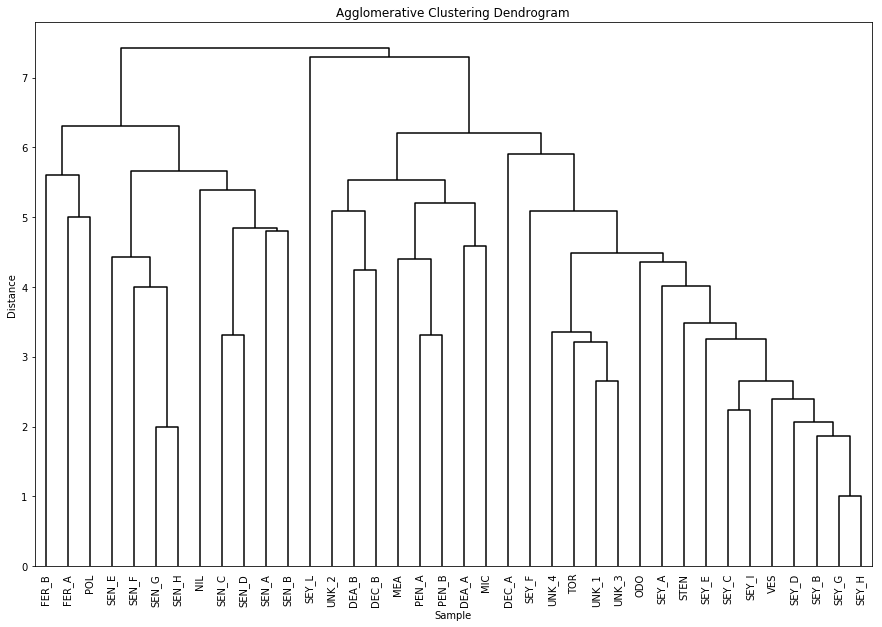

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage, complete, cophenet
from scipy.spatial.distance import pdist

dist_metrics = ['braycurtis', 'canberra', 'cityblock', 'correlation', 'cosine',\
                'dice', 'euclidean', 'hamming', 'jaccard', 'kulsinski', 'matching',\
                'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener',\
                'sokalsneath', 'sqeuclidean', 'yule']

methods = ['single','weighted','average', 'weighted', 'centroid', 'median', 'ward']

#for method in methods:
#    print 'method = ', method
#    for dist in dist_metrics:
#        dist_p = pdist(Comp, dist)
#        linkage_array = linkage(Comp, method)
#        c, coph_dists = cophenet(linkage_array, dist_p)
#        print '\t',dist, ' = ', c

dist_p = pdist(processed, 'hamming')
linkage_array = linkage(processed, 'average')
names=list(clusters['Species'])


plt.figure(figsize=(15, 10))
plt.title('Agglomerative Clustering Dendrogram')
plt.xlabel('Sample')
plt.ylabel('Distance')

dendrogram(
    linkage_array,
    leaf_rotation=90.,
    leaf_font_size=10.,
    labels=names,
    truncate_mode='level',
    link_color_func=lambda x: 'k',
    p=38,
)
plt.savefig('dendrogram.svg', format="svg")

Do the clustering for a specific number of cluster (n_clusters)<br>


In [9]:
clusters = cluster(processed, Comp, 5)

In [10]:
clusters.reset_index().pivot(columns='Cluster', values='Species')

Cluster,0,1,2,3,4
0,None,None,None,None,DEA_A
1,None,None,None,None,DEA_B
2,DEC_A,None,None,None,None
3,None,None,None,None,DEC_B
4,None,None,None,FER_A,None
5,None,None,None,FER_B,None
6,None,None,None,None,MEA
7,None,None,None,None,MIC
8,None,NIL,None,None,None
9,ODO,None,None,None,None


Change the format and write the output file

In [11]:
clusters.reset_index().pivot(columns='Cluster', values='Species').to_csv('Cluster_Assgnments_5.csv')

Manifold learning to cluster gums

In [12]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import Scatter, Layout, Figure, Scatter3d
from sklearn.preprocessing import LabelEncoder
init_notebook_mode(connected=True)

tsne = TSNE(n_components=2, init='random', random_state=20573920, perplexity=5)
Comp_tsne = tsne.fit_transform(processed)

text_labels = list(processed.index)

labels_txt = ['DEA','DEA','DEC','DEC','FER','FER','MEA',\
              'MIC','NIL','ODO','PEN','PEN','POL','SEN','SEN',\
              'SEN','SEN','SEN','SEN','SEN','SEN','SEY',\
              'SEY','SEY','SEY','SEY','SEY','SEY','SEY',\
              'SEY','SEY','STEN','TOR','UNK','UNK','UNK',\
              'UNK','VES']

l_enc = LabelEncoder()
labels = l_enc.fit_transform(labels_txt)

tsne_fit = [Scatter(x=Comp_tsne[:,0], y=Comp_tsne[:,1], mode='markers+text',
                    text=text_labels, textposition='bottom', textfont=dict(size=10),
                    marker=dict(size=8, color=labels,  colorscale='RdBu'))]

layout = Layout(xaxis=dict(title='t-SNE Component 1', zeroline=False),\
                yaxis=dict(title='t-SNE Component 2', zeroline=False),\
                )

fig = Figure(data=tsne_fit, layout=layout) 

iplot(fig, show_link=False)

In [13]:
processed.index

Index([u'DEA_A', u'DEA_B', u'DEC_A', u'DEC_B', u'FER_A', u'FER_B', u'MEA',
       u'MIC', u'NIL', u'ODO', u'PEN_A', u'PEN_B', u'POL', u'SEN_A', u'SEN_B',
       u'SEN_C', u'SEN_D', u'SEN_E', u'SEN_F', u'SEN_G', u'SEN_H', u'SEY_A',
       u'SEY_B', u'SEY_C', u'SEY_D', u'SEY_E', u'SEY_F', u'SEY_G', u'SEY_H',
       u'SEY_I', u'SEY_L', u'STEN', u'TOR', u'UNK_1', u'UNK_2', u'UNK_3',
       u'UNK_4', u'VES'],
      dtype='object', name=u'Species')

In [36]:
tsne = TSNE(n_components=2, init='random', random_state=20573920, perplexity=5)
Comp_tsne = tsne.fit_transform(processed)

text_labels = list(processed.index)

labels_txt = ['DEA','DEA','DEC','DEC','FER','FER','MEA',\
              'MIC','NIL','ODO','PEN','PEN','POL','SEN','SEN',\
              'SEN','SEN','SEN','SEN','SEN','SEN','SEY',\
              'SEY','SEY','SEY','SEY','SEY','SEY','SEY',\
              'SEY','SEY','STEN','TOR','UNK','UNK','UNK',\
              'UNK','VES']

top_labels = ['','DEA_B','DEC_A','','FER_A','FER_B','MEA',\
              '','NIL','','','','','SEN_A','',\
              'SEN_C','','','','','','SEY_A',\
              'SEY_B','','SEY_D','SEY_E','SEY_F','SEY_G','SEY_H',\
              'SEY_I','SEY_L','STEN','','','','UNK_3',
              'UNK_4','VES']

bottom_labels = ['','','','','','','',\
                 'MIC','','ODO','','PEN_B','POL','','',\
                 '','SEN_D','','','','SEN_H','',\
                 '','','','','','','',\
                 '','','','TOR','UNK_1','','',
                 '','']

bottom_right_labels = ['DEA_A','','','DEC_B','','','',\
                       '','','','PEN_A','','','','',\
                       '','','SEN_E','SEN_F','SEN_G','','',\
                       '','SEY_C','','','','','',\
                       '','','','','','UNK_2','',
                       '','']

bottom_left_labels = ['','','','','','','',\
                       '','','','','','','','SEN_B',\
                       '','','','','','','',\
                       '','','','','','','',\
                       '','','','','','','',
                       '','']

l_enc = LabelEncoder()
labels = l_enc.fit_transform(labels_txt)

tsne_fit_1 = Scatter(x=Comp_tsne[:,0], y=Comp_tsne[:,1], mode='markers+text',
                     text=top_labels, textposition='top', textfont=dict(size=7),
                     marker=dict(size=6, color=labels,  colorscale='RdBu'))

tsne_fit_2 = Scatter(x=Comp_tsne[:,0], y=Comp_tsne[:,1], mode='markers+text',
                     text=bottom_labels, textposition='bottom', textfont=dict(size=7),
                     marker=dict(size=6, color=labels,  colorscale='RdBu'))

tsne_fit_3 = Scatter(x=Comp_tsne[:,0], y=Comp_tsne[:,1], mode='markers+text',
                     text=bottom_right_labels, textposition='right', textfont=dict(size=7),
                     marker=dict(size=6, color=labels,  colorscale='RdBu'))

tsne_fit_4 = Scatter(x=Comp_tsne[:,0], y=Comp_tsne[:,1], mode='markers+text',
                     text=bottom_left_labels, textposition='left', textfont=dict(size=7),
                     marker=dict(size=6, color=labels,  colorscale='RdBu'))

tsne_fit = [tsne_fit_1, tsne_fit_2, tsne_fit_3, tsne_fit_4]


layout = Layout(xaxis=dict(title='t-SNE Component 1', zeroline=False),\
                yaxis=dict(title='t-SNE Component 2', zeroline=False),
                showlegend=False)

fig = Figure(data=tsne_fit, layout=layout) 

iplot(fig, show_link=False, image='svg')